In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
training = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([training,test])

all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [3]:
df_num = training[['Age','SibSp','Parch','Fare']]
df_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

# Feature engineering

- Will ignore `PassengerID`, `Name`, `Ticket` is too unordered. Statistically does not makes any sence.
- The `Cabin` is very important, but needs to find the way to convert it to nummeric. (Data is not presented in 25% cases)
- `Embarked` does not make sence to me atm.

## Cabin

In [4]:
df_cat.Cabin
training['cabin_pre_person'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
training['cabin_pre_person'].value_counts()

cabin_pre_person
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

In [6]:
pd.pivot_table(training, index = 'Survived', columns = 'cabin_pre_person', values = 'Ticket' ,aggfunc ='count')

cabin_pre_person,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


From this pivot table can deduct that passengers with known `Cabin` has better chance to survive. Passangers without `Cabin` could had low class, low price tickets.

In [8]:
#comparing surivial rate by cabin
training['cabin_adv'] = training.Cabin.apply(lambda x: str(x)[0])
print(training.cabin_adv.value_counts())
pd.pivot_table(training,index='Survived',columns='cabin_adv', values = 'Name', aggfunc='count')

cabin_adv
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


### Cabin, Pclass, Fare, SibSp and Parch

Let see if Cabin, Pclass and Fare has any relationship with SibSp and Parch

In [19]:
data = all_data[["PassengerId", "Pclass", "Cabin", "Fare", "SibSp", "Parch", "Survived"]].dropna()

ascending_data= data.sort_values(by='Fare', ascending=False)
ascending_data.head()

,PassengerId,Pclass,Cabin,Fare,SibSp,Parch,Survived
679,680,1,B51 B53 B55,512.3292,0,1,1.0
737,738,1,B101,512.3292,0,0,1.0
88,89,1,C23 C25 C27,263.0000,3,2,1.0
341,342,1,C23 C25 C27,263.0000,3,2,1.0
27,28,1,C23 C25 C27,263.0000,3,2,0.0


### Normalize Fare

<Axes: >

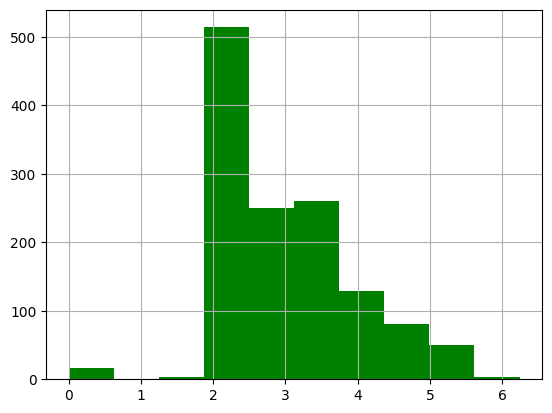

In [22]:
# log norm of fare
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist(color="green")